<a href="https://colab.research.google.com/github/IhlasulMufti/Machine-Learning/blob/main/Machine-Learning-UNHAS/Tugas_MID_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pembuatan Model Machine Learning Terhadap Datasets Student**

## import library


In [ ]:
import pandas as pd
import numpy as np
# import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, f1_score, classification_report, confusion_matrix, mean_absolute_error

# import model
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE

## Download dataset ke directory datasets/student/

In [ ]:
import urllib.request
import os

url_student_mat = "https://drive.google.com/uc?export=download&id=1oZ7c94D5ApCBic1rzOuhaHOzqOJzTg9v"
url_student_por = "https://drive.google.com/uc?export=download&id=1eTSHndcDlAGvk5BQ-g4vg8ExYjxdpvso"

datapath = os.path.join("datasets", "student", "")
os.makedirs(datapath, exist_ok=True)

print("Downloading : student_mat")
urllib.request.urlretrieve(url_student_mat, datapath + "student_mat.csv")

print("Downloading : student_por")
urllib.request.urlretrieve(url_student_por, datapath + "student_por.csv")

('datasets/student/student_por.csv',
 <http.client.HTTPMessage at 0x7f2a2d896bd0>)

## Data preparation (Preprocessing)


### Load dataset student

In [ ]:
student_mat = pd.read_csv("/content/datasets/student/student_mat.csv", sep=';')
student_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
student_por = pd.read_csv("/content/datasets/student/student_por.csv", sep=';')
student_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Menggabungkan dataset kedua sekolah

In [ ]:
df_merge = pd.concat([student_mat, student_por])
df_merge

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Melihat detail dari datasets

In [ ]:
df_merge.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df_merge.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Encoding
  

In [ ]:
df_merge_clean = df_merge.copy()

In [ ]:
# School
# Unique Schools
df_merge_clean.loc[df_merge_clean['school']=='GP', 'school'] = 1
df_merge_clean.loc[df_merge_clean['school']=='MS', 'school'] = 2

# Gender
# Unique Genders
df_merge_clean.loc[df_merge_clean['sex']=='M', 'sex'] = 1
df_merge_clean.loc[df_merge_clean['sex']=='F', 'sex'] = 2



# Address
# Unique Address
df_merge_clean.loc[df_merge_clean['address']=='R', 'address'] = 1
df_merge_clean.loc[df_merge_clean['address']=='U', 'address'] = 2

# Family Size
# Unique Family Sizes
df_merge_clean.loc[df_merge_clean['famsize']=='LE3', 'famsize'] = 1
df_merge_clean.loc[df_merge_clean['famsize']=='GT3', 'famsize'] = 2



# Parent Status
# Unique Parent Statuses
df_merge_clean.loc[df_merge_clean['Pstatus']=='A', 'Pstatus'] = 1
df_merge_clean.loc[df_merge_clean['Pstatus']=='T', 'Pstatus'] = 2


# Mother's Job Status
# Unique Mothers' jobs
df_merge_clean.loc[df_merge_clean['Mjob']=='teacher', 'Mjob'] = 5
df_merge_clean.loc[df_merge_clean['Mjob']=='services', 'Mjob'] = 4
df_merge_clean.loc[df_merge_clean['Mjob']=='health', 'Mjob'] = 3
df_merge_clean.loc[df_merge_clean['Mjob']=='other', 'Mjob'] = 2
df_merge_clean.loc[df_merge_clean['Mjob']=='at_home', 'Mjob'] = 1


# Father's Job Status
# Unique Fathers' jobs
df_merge_clean.loc[df_merge_clean['Fjob']=='teacher', 'Fjob'] = 5
df_merge_clean.loc[df_merge_clean['Fjob']=='services', 'Fjob'] = 4
df_merge_clean.loc[df_merge_clean['Fjob']=='health', 'Fjob'] = 3
df_merge_clean.loc[df_merge_clean['Fjob']=='other', 'Fjob'] = 2
df_merge_clean.loc[df_merge_clean['Fjob']=='at_home', 'Fjob'] = 1


# Reasons
# Unique Reasons
df_merge_clean.loc[df_merge_clean['reason']=='reputation', 'reason'] = 4
df_merge_clean.loc[df_merge_clean['reason']=='course', 'reason'] = 3
df_merge_clean.loc[df_merge_clean['reason']=='home', 'reason'] = 2
df_merge_clean.loc[df_merge_clean['reason']=='other', 'reason'] = 1



# Guardians
# Unique Guardians
df_merge_clean.loc[df_merge_clean['guardian']=='father', 'guardian'] = 3
df_merge_clean.loc[df_merge_clean['guardian']=='mother', 'guardian'] = 2
df_merge_clean.loc[df_merge_clean['guardian']=='other', 'guardian'] = 1


# School Support
# Unique School Supports
df_merge_clean.loc[df_merge_clean['schoolsup']=='yes', 'schoolsup'] = 2
df_merge_clean.loc[df_merge_clean['schoolsup']=='no', 'schoolsup'] = 1

# Family Support
# Unique Family Supports
df_merge_clean.loc[df_merge_clean['famsup']=='yes', 'famsup'] = 2
df_merge_clean.loc[df_merge_clean['famsup']=='no', 'famsup'] = 1


# Paid
# Unique Pays
df_merge_clean.loc[df_merge_clean['paid']=='yes', 'paid'] = 2
df_merge_clean.loc[df_merge_clean['paid']=='no', 'paid'] = 1


# Activities
# Unique Activities
df_merge_clean.loc[df_merge_clean['activities']=='yes', 'activities'] = 2
df_merge_clean.loc[df_merge_clean['activities']=='no', 'activities'] = 1

# Nursery
# Unique Nursery status
df_merge_clean.loc[df_merge_clean['nursery']=='yes', 'nursery'] = 2
df_merge_clean.loc[df_merge_clean['nursery']=='no', 'nursery'] = 1

# Higher Education
# Unique Higher Education status
df_merge_clean.loc[df_merge_clean['higher']=='yes', 'higher'] = 2
df_merge_clean.loc[df_merge_clean['higher']=='no', 'higher'] = 1

# Internet
# Unique Internet Status
df_merge_clean.loc[df_merge_clean['internet']=='yes', 'internet'] = 2
df_merge_clean.loc[df_merge_clean['internet']=='no', 'internet'] = 1


# Relationship
# Unique Relationship Status
df_merge_clean.loc[df_merge_clean['romantic']=='yes', 'romantic'] = 2
df_merge_clean.loc[df_merge_clean['romantic']=='no', 'romantic'] = 1

In [ ]:
df_merge_clean

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,2,18,2,2,1,4,4,1,5,...,4,3,4,1,1,3,6,5,6,6
1,1,2,17,2,2,2,1,1,1,2,...,5,3,3,1,1,3,4,5,5,6
2,1,2,15,2,1,2,1,1,1,2,...,4,3,2,2,3,3,10,7,8,10
3,1,2,15,2,2,2,4,2,3,4,...,3,2,2,1,1,5,2,15,14,15
4,1,2,16,2,2,2,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,2,19,1,2,2,2,3,4,2,...,5,4,2,1,2,5,4,10,11,10
645,2,2,18,2,1,2,3,1,5,4,...,4,3,4,1,1,1,4,15,15,16
646,2,2,18,2,2,2,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,2,1,17,2,1,2,3,1,4,4,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
df_merge_clean.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_merge_clean['school'].unique()

array([1, 2], dtype=object)

### Pengecekan Korelasi Setiap Feature terhadap label

Text(0.5, 1.0, 'Correlation between features`1')

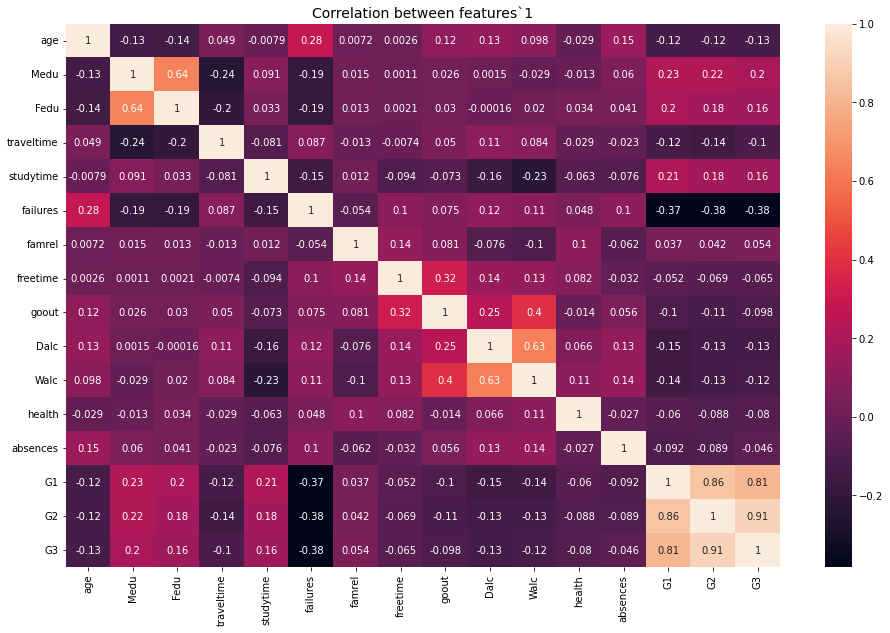

In [ ]:
# create heatmap for the calculated correlation
plt.figure(figsize=(16,10))
sns.heatmap(df_merge_clean[np.array(df_merge_clean.columns)].corr(),annot=True, fmt='.2g')
plt.title('Correlation between features`1', fontsize=14)

In [ ]:
correlation2class = abs(df_merge_clean.corr()["G3"])
correlation2class.drop("G3", inplace=True)
correlation2class.sort_values(ascending=False)

G2            0.910743
G1            0.809142
failures      0.383145
Medu          0.201472
studytime     0.161629
Fedu          0.159796
Dalc          0.129642
age           0.125282
Walc          0.115740
traveltime    0.102627
goout         0.097877
health        0.080079
freetime      0.064890
famrel        0.054461
absences      0.045671
Name: G3, dtype: float64

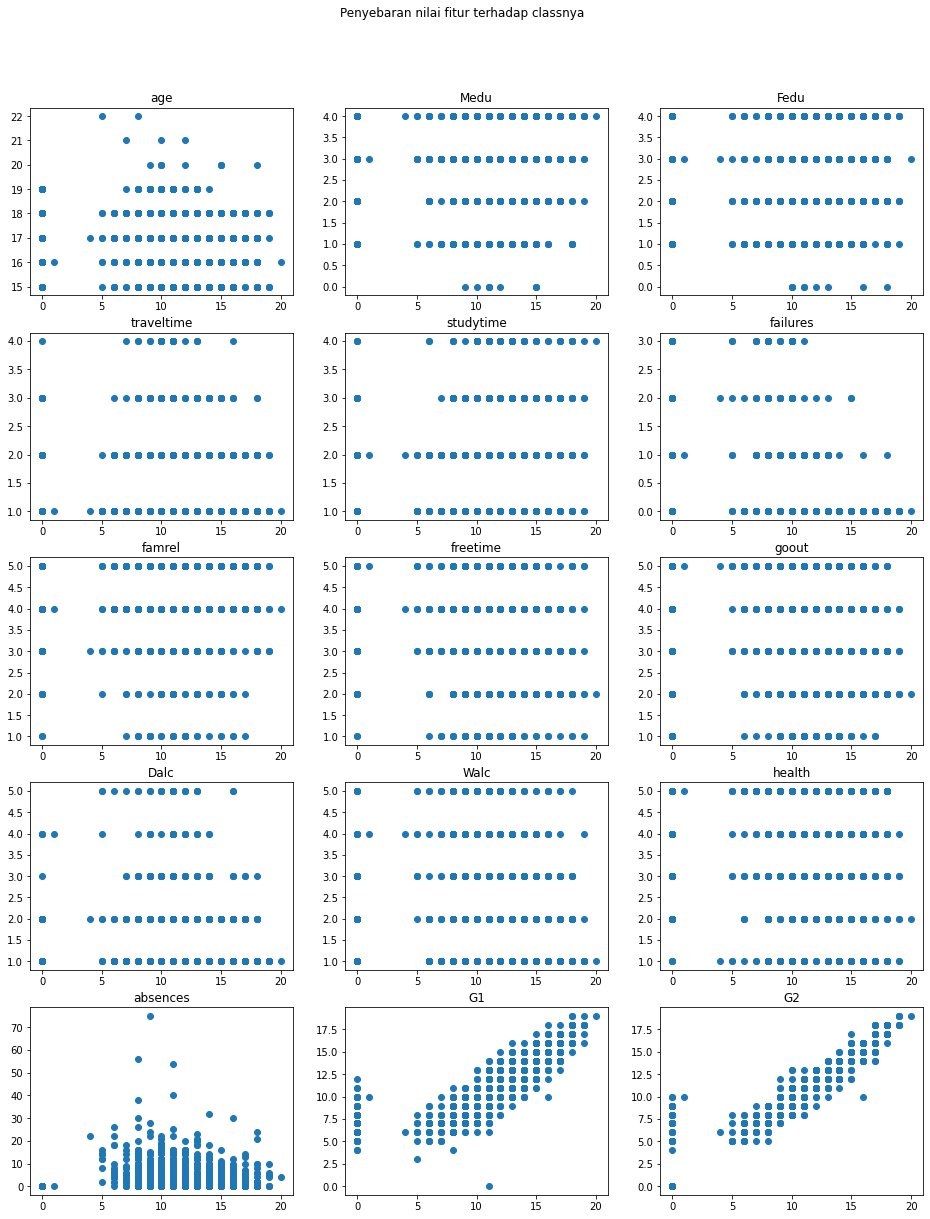

In [ ]:
index = correlation2class.index

fig, axs = plt.subplots(nrows=5,ncols=3, figsize=(16,20))
for n, ax in enumerate(axs.flatten()):
    ax.scatter(df_merge_clean["G3"], df_merge_clean[index[n]])
    # ticks = [n % 4 == 0, n > 12]
    # ax.tick_params(left=ticks[0], bottom=ticks[1])

    ax.set_title(index[n])

plt.suptitle('Penyebaran nilai fitur terhadap classnya', y = 0.95)
# plt.subplots_adjust(wspace=0.05)
plt.show()

#### Pengambalian feature yang memiliki korelasi paling berpengaruh terhadap label

In [ ]:
df_merge_drop = df_merge_clean[['G1','G2','G3']]

In [ ]:
column_names = df_merge_drop.columns
column_names

Index(['G1', 'G2', 'G3'], dtype='object')

### Pengecekan kemungkinan dataset memiliki outliers

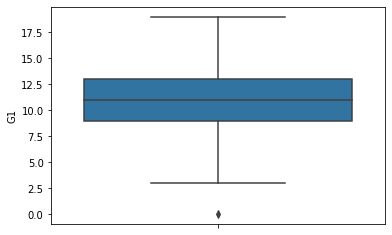

In [ ]:
sns.boxplot(y=df_merge_drop['G1'])

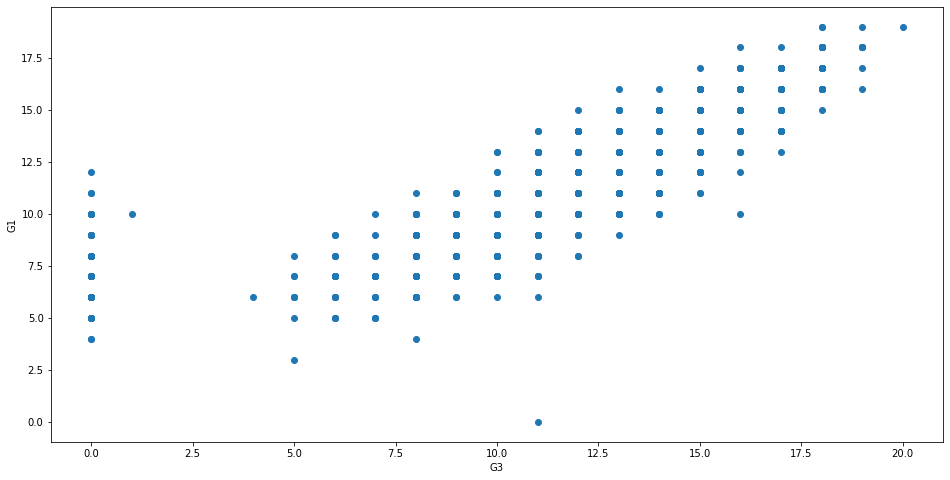

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_merge_drop['G3'], df_merge_drop['G1'])
ax.set_xlabel('G3')
ax.set_ylabel('G1')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  

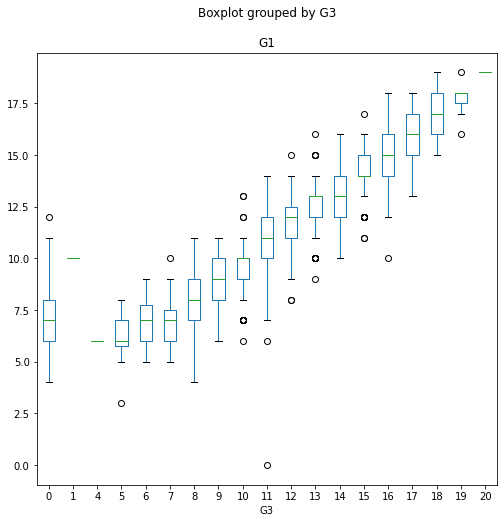

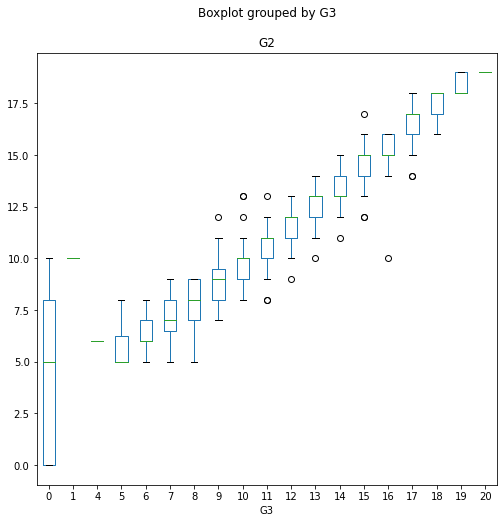

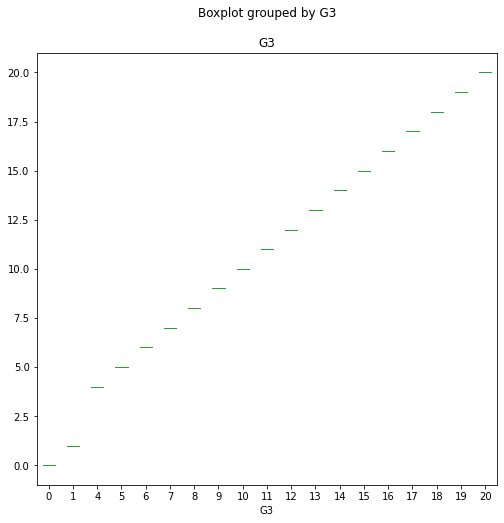

In [ ]:
x = df_merge_drop.drop("G3",1)
columns_name = list(x.columns)

for i in column_names:
  df_merge_drop.boxplot(by ='G3', column =[i], grid = False,figsize=(8,8)) 

### Melakukan pembagian set menjadi X dan y

In [ ]:
X = df_merge_clean[['G1', 'G2']]
y = df_merge_clean['G3']

In [ ]:
X

,G1,G2
0,5,6
1,5,5
2,7,8
3,15,14
4,6,10
...,...,...
644,10,11
645,15,15
646,11,12
647,10,10


In [ ]:
y

0       6
1       6
2      10
3      15
4      10
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 1044, dtype: int64

### Pembagian dataset menjadi data train dan data test

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.2,random_state=0)

## Pembuatan Model Machine Learning

### Multiple Linear Regression

In [ ]:
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('intercept=',model1.intercept_)

intercept= -1.2974319170862074


In [ ]:
print('slope=',model1.coef_)

slope= [0.15279214 0.96687219]


In [ ]:
y_predict = model1.predict(X_test)
print(y_predict)

[ 7.35429845 12.29133221  9.8992114  10.86608359  8.62675493 12.13854007
 15.65032521 13.10541226  8.47396278 -0.5334712   7.5070906  13.2582044
 15.65032521 14.22507659 13.2582044  10.20479569  6.38742626  8.93233921
 13.2582044  10.86608359 16.76998954 11.98574792 13.41099654  8.62675493
  9.8992114   4.30088974 10.86608359 16.46440525  9.8992114  12.5969165
  8.32117064 14.22507659 12.29133221  6.69301055 12.5969165  11.01887573
 11.01887573 10.71329145  4.45368189 11.01887573  8.77954707 13.56378869
  7.5070906  14.53066087  7.81267488 10.86608359  9.59362712  9.8992114
 11.32446002 14.37786873 18.70373392  7.81267488 10.86608359  8.62675493
 13.10541226  8.93233921 16.31161311 14.37786873  9.8992114   7.81267488
  5.57334622 10.86608359 14.22507659 12.95262011 14.53066087 10.05200355
  7.35429845  9.74641926  9.74641926 10.05200355  7.65988274  7.65988274
 11.01887573  8.77954707  9.74641926 12.79982797 15.49753306  8.62675493
 11.83295578  8.93233921 18.85652606  9.8992114  10.86

In [ ]:
linreg_score = r2_score(y_test, y_predict)
mape = mean_absolute_error(y_test, y_predict)*100
mse = mean_squared_error(y_test,y_predict)
print("R^2 Score menggunakan Linear Regression", linreg_score)
print("Mean Absolute Percentage Error menggunakan Linear Regression:", mape)
print("Mean Squared Error Menggunakan Linear Regression", mse)

R^2 Score menggunakan Linear Regression 0.8357351045935961
Mean Absolute Percentage Error menggunakan Linear Regression: 79.825667246576
Mean Squared Error Menggunakan Linear Regression 1.542166867910812


In [ ]:
y_round1 = []
y_round1

[]

In [ ]:
for i in y_predict:
  y_round1.append(round(i))

In [ ]:
y_round1 = np.array(y_round1)
y_round1

array([ 7, 12, 10, 11,  9, 12, 16, 13,  8, -1,  8, 13, 16, 14, 13, 10,  6,
        9, 13, 11, 17, 12, 13,  9, 10,  4, 11, 16, 10, 13,  8, 14, 12,  7,
       13, 11, 11, 11,  4, 11,  9, 14,  8, 15,  8, 11, 10, 10, 11, 14, 19,
        8, 11,  9, 13,  9, 16, 14, 10,  8,  6, 11, 14, 13, 15, 10,  7, 10,
       10, 10,  8,  8, 11,  9, 10, 13, 15,  9, 12,  9, 19, 10, 11, 12, 11,
       15, 10, 10, 11, 11, 13, 12,  9, 11, 10, 10, 12, 12,  9, 12,  8,  9,
        9,  6, 11,  6,  5, 14, 18,  9,  9, 13, 10, 10,  8, 11,  9,  9, 20,
       15, 15, 11, 12, 12,  9, 11, 11, 13, 14,  7, 16, 12, 16, 10, 10, 11,
       11, 12,  7, 13,  9, 15, 10,  4, 16, 14, 12, 14,  8, 12, 10, 11, 14,
       17, 11, 13,  9,  9,  9, 16, 18, 11,  8,  9, 14, 15, 10, 13,  8, 19,
       11, 12, 18, 12, 14, 13,  8, 13, 11, 17, 11, 12, 13, 14, 16, 11, 10,
       15,  9, 12, 10, 12,  8, 10, 14,  9,  9, 13, 14, 13, 17,  9,  7, 11,
        8, 12,  9,  8, 10])

In [ ]:
y_result1 = y_test == y_round1

In [ ]:
y_result1.value_counts()

False    110
True      99
Name: G3, dtype: int64

### Multivariate Logistic Regression

In [ ]:
logreg = lm.LogisticRegression(solver='newton-cg')

rfe = RFE(logreg, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

In [ ]:
print("Support", rfe.support_)
print("Ranking", rfe.ranking_)

Support [ True  True]
Ranking [1 1]


In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
y_logreg_predict = logreg.predict(X_test)

In [ ]:
y_logreg_predict

array([ 8, 13, 10, 11, 10, 12, 15, 14, 10,  0,  8, 13, 15, 14, 13, 11,  8,
       10, 13, 11, 16, 12, 13, 10, 10,  0, 11, 15, 10, 13, 10, 14, 13,  8,
       13, 11, 11, 11,  0, 11, 10, 13,  8, 15,  8, 11, 10, 10, 11, 15, 18,
        8, 11, 10, 14, 10, 15, 15, 10,  8,  0, 11, 14, 14, 15, 11,  8, 10,
       10, 11,  8,  8, 11, 10, 10, 14, 15, 10, 12, 10, 18, 10, 11, 12, 11,
       15, 11, 10, 11, 11, 14, 12, 10, 11, 10, 11, 12, 13,  5, 13,  8, 10,
       10,  0, 11,  0,  0, 14, 17, 10, 10, 14, 10, 10,  8, 11, 10, 10, 18,
       15, 15, 11, 13, 13, 10, 11, 11, 13, 14,  8, 15, 13, 16, 10, 10, 11,
       11, 13,  8, 14, 10, 15, 10,  0, 15, 14, 12, 15,  8, 12, 10, 11, 14,
       16, 11, 13, 10, 10, 10, 15, 18, 11, 10, 10, 15, 15, 10, 13, 10, 17,
       11, 13, 17, 13, 14, 13,  8, 13, 11, 16, 11, 13, 14, 14, 15, 11, 10,
       15, 10, 12, 11, 12,  8, 10, 14, 10, 10, 14, 15, 13, 18, 10,  8, 11,
       10, 12, 10,  8, 10])

In [ ]:
logreg_score=r2_score(y_test, y_logreg_predict)
mape = mean_absolute_error(y_test, y_logreg_predict)*100
mse = mean_squared_error(y_test,y_logreg_predict)
print("R^2 Score menggunakan Logistic Regression", logreg_score)
print("Mean Absolute Percentage Error menggunakan Logistic Regression:", mape)
print("Mean Squared Error Menggunakan Logistic Regression", mse)

R^2 Score menggunakan Logistic Regression 0.7110317247433491
Mean Absolute Percentage Error menggunakan Logistic Regression: 83.73205741626795
Mean Squared Error Menggunakan Logistic Regression 2.712918660287081


In [ ]:
y_result2 = y_test == y_logreg_predict

In [ ]:
y_result2.value_counts()

True     105
False    104
Name: G3, dtype: int64